# Desarrollo Tarea 2 - Bioinformática

- Vicente Álvarez
- Iñaki Oyarzun M.


### Preparación de librerias
Se procede con la instalacion de las librerias a utilizar como parte del notebook

In [26]:
!pip install biopython

In [27]:
from Bio.Data.CodonTable import unambiguous_dna_by_id
from Bio import SeqIO
from random import choice
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [28]:
def altcodons(codon, table):
    """List codons that code for the same aminonacid / are also stop.

    @param codon
    @table code table id
    @return list of codons

    """
    plus4 = [["CGT","CGC","CGA","CGG","AGA","AGG"],["CTT","CTC","CTA","CTG","TTA","TTG"],["TCT","TCC","TCA","TCG","AGT","AGC"]]
    for l in plus4:
      if codon in l:
        return l

    tab = unambiguous_dna_by_id[table]

    if codon in tab.stop_codons:
        return tab.stop_codons

    try:
        aa = tab.forward_table[codon]
    except:
        return []

    return [
        k
        for (k, v) in tab.forward_table.items()
        if v == aa and k[0] == codon[0] and k[1] == codon[1]
    ]


def degeneration(codon, table):
    """Determine how many codons code for the same amino acid / are also stop

    @param codon the codon
    @param table code table id
    @param the number of codons also coding for the amino acid codon codes for

    """
    return len(altcodons(codon, table))


def is_x_degenerated(x, codon, table):
    """Determine if codon is x-fold degenerated.

    @param codon the codon
    @param table code table id
    @param true if x <= the degeneration of the codon

    """
    return x <= len(altcodons(codon, table))


def degenerated_subseq(seq, x, table):
    """Get a subsequence consisting of the x-fold degenerated codons only."""
    data = ""
    for i in range(0, len(seq), 3):
        codon = seq[i : i + 3].tostring()
        if is_x_degenerated(x, codon, table):
            data += codon
    return data

***
# Pregunta 1

### a)
Para el alineamiento de las secuencias, se vuelven a generar el blasting basado en los datos indicados en la tarea anterior, se indica en la siguiente foto los resultados junto a los rangos en los que se encontró. 
<br><br>
![Blasting](content/BLAST.png "Resultados de realización BLAST, junto a rangos hallados")<br>
Resultados Blasting
<br><br>
Luego se decide hacer uso de Kalign, con la siguiente configuración y archivo unificado de las primeras 5 secuencias que entrega BLAST:
<br><br>
![Alineamiento](content/AlineamientoHecho.png "Archivo para alineaminto en Kalign utilizado")
<br>
Alineamiento
<br><br>
![Kalign](content/Kalign.png "Configuración Kalign utilizada")
<br>
Configuración Kalign
<br><br><br>
De los desarrollos realizados, Kalign entrega los siguientes resultados:
<br><br><br>
![Alineamiento 1](content/P1_L1.png "Alineamiento de la proteína 1")
<br>
Alineamiento proteína 1
<br><br>
![Alineamiento 2](content/P1_L2.png "Alineamiento de la proteína 2")
<br>
Alineamiento proteína 2
<br><br>
![Alineamiento 3](content/P1_L3.png "Alineamiento de la proteína 3")
<br>
Alineamiento proteína 3
<br><br>
![Alineamiento 4](content/P1_L4.png "Alineamiento de la proteína 4")
<br>
Alineamiento proteína 4
<br><br>
![Alineamiento 5](content/P1_L5.png "Alineamiento de la proteína 5")
<br>
Alineamiento proteína 5
<br><br><br>
Notar que de las 5 proteinas alineadas, solo la proteina 1, 4 y 5 contienen los segmentos con el nombre ingresado (subrayado). En cambio las otras no se encontraban como parte del alineamiento.

### b)
Para este caso, se hace uso de los siguientes segmentos (Obtenidos de la imagen anterior de BLAST):

- Proteina 1: VKNAKIALVARE
- Proteina 2: VIDIGKTNAKVALVARES
- Proteina 3: VIDIGKTNAKVALVARES
- Proteina 4: VINSKIALIDRGSC
- Proteina 5: INGKIALIERGSCN

Al alinearlos nuevamente utilizando Kalign, se obtiene lo siguiente:
<br><br>
![Alineamiento](content/P1_L6.png "Alineamiento de los segmentos de las 5 proteínas")
<br>
Alineamiento de las 5 proteínas
<br><br><br>
### c)
Usando los alineamientos se construye y dibuja el HMM
<br>
Alineamiento<br>
<br>
![Alineamiento](content/Alignment.png "Alineamiento de los segmentos de las 5 proteínas")
<br><br>
Se plantea una expresión regular para estudiar los patrones de la siguiente manera:
<br><br>
![Regex](content/Regex.png "Expresion regular para estudio de patrones")
<br>
Expresion regular para estudio de patrones
<br><br>
Siendo de la siguiente forma:<br>
\* [KTI] N [ASG] K [VI] AL [VI] [ADE] R [EG] S *

***
# Pregunta 3

### a) 
Para el desarrollo de esta pregunta, se toma por lo entendido en clase que los codones tanto de inicio y fin no son tomados en cuenta.

In [43]:
def split_codon(seq):
  split_seq = [seq[i:i+3] for i in range(0, len(seq), 3)]
  return split_seq

def seq_rand(seq):
  """Randomiza los codónes de una secuencia codificadora por sus homologos

  @param seq la secuencia codificadora a randomizar (string)
  @param la secuencia seq randomizada
  """
  codones = split_codon(seq)
  for i in range(1, len(codones)):
    options = altcodons(codones[i], 1)
    codones[i] = choice(options)
  res = "".join(codones)
  return res

### b)

In [41]:
def nucleo_score(codons):
  best_codon = ""
  max_score = 0
  for c in codons:
    s = c.count('C')+c.count('G')
    if s >= max_score:
      best_codon = c
      max_score = s
  return best_codon

def seq_maxGC(seq):
  """Aumenta el porcentaje de bases G y C

  @param seq la secuencia codificadora a alterar (string)
  @param la secuencia seq maximizada para G y C
  """
  codones = split_codon(seq)
  for i in range(1, len(codones)):
    options = altcodons(codones[i], 1)
    b = nucleo_score(options)
    codones[i] = b
  res = "".join(codones)
  return res

### c)

In [46]:
unparsed = SeqIO.read('content/cds.fna','fasta')
sequence = str(unparsed.seq)

randomized_sequence = seq_rand(sequence)
maximized_sequence = seq_maxGC(sequence)

recR = SeqRecord(
    Seq(
        randomized_sequence,
    ),
)

recGC = SeqRecord(
    Seq(
        maximized_sequence,
    ),
)

print("Secuencia randomizada:\n",maximized_sequence)
print("\nSecuencia maximizada:\n",maximized_sequence)

SeqIO.write(recR, "content/cds_random.fna", "fasta")
SeqIO.write(recGC, "content/cds_maxGC.fna", "fasta")

Secuencia randomizada:
 ATGGACCTGAGCGCGCTGCGGGTGGAGGAGGTGCAGAACGTGATCAACGCGATGCAGAAGATCCTGGAGTGCCCGATCTGCCTGGAGCTGATCAAGGAGCCGGTGAGCACGAAGTGCGACCACATCTTCTGCAAGTTCTGCATGCTGAAGCTGCTGAACCAGAAGAAGGGGCCGAGCCAGTGCCCGCTGTGCAAGAACGACATCACGAAGCGGAGCCTGCAGGAGAGCACGCGGTTCAGCCAGCTGGTGGAGGAGCTGCTGAAGATCATCTGCGCGTTCCAGCTGGACACGGGGCTGGAGTACGCGAACAGCTACAACTTCGCGAAGAAGGAGAACAACAGCCCGGAGCACCTGAAGGACGAGGTGAGCATCATCCAGAGCATGGGGTACCGGAACCGGGCGAAGCGGCTGCTGCAGAGCGAGCCGGAGAACCCGAGCCTGCAGGAGACGAGCCTGAGCGTGCAGCTGAGCAACCTGGGGACGGTGCGGACGCTGCGGACGAAGCAGCGGATCCAGCCGCAGAAGACGAGCGTGTACATCGAGCTGGGGAGCGACAGCAGCGAGGACACGGTGAACAAGGCGACGTACTGCAGCGTGGGGGACCAGGAGCTGCTGCAGATCACGCCGCAGGGGACGCGGGACGAGATCAGCCTGGACAGCGCGAAGAAGGCGGCGTGCGAGTTCAGCGAGACGGACGTGACGAACACGGAGCACCACCAGCCGAGCAACAACGACCTGAACACGACGGAGAAGCGGGCGGCGGAGCGGCACCCGGAGAAGTACCAGGGGAGCAGCGTGAGCAACCTGCACGTGGAGCCGTGCGGGACGAACACGCACGCGAGCAGCCTGCAGCACGAGAACAGCAGCCTGCTGCTGACGAAGGACCGGATGAACGTGGAGAAGGCGGAGTTCTGCAACAAGAGCAAGCAGCCGGGGCTGGCGCGGAGCCAGCACAACCGGTGGGCGGGGAGCAAGG

1

### d)

En base a una investigación realizada para comprender la distribución que se da dentro de una secuencia para los porcentajes de GC solo se pudo hallar una que menciona una distribución clusterizada a lo largo de la secuencia, en este caso a partir de la [Siguiente publicación](https://www.researchgate.net/publication/12570323_SEGMENT_identifying_compositional_domains_in_DNA_sequences) Realizada por Oliver et. al. (2000). El cual plantea una distribución en un estilo de clusters los cuales con largas partes que pueden tener CG y otras secciones que no. Se adjunta la imagen del gráfico presentado para ello:<br><br>
![Variación GC](content/GC-variation-along-the-DNA-sequence-of-the-lambda-phage-genome.png "Grafico de distribución porcentaje GC a lo largo de una secuencia")
<br><br>

Con esto, se nos ocurre la siguiente metodología para trabajar:
1. Calcular el tamaño de la sequencia codificadora, excluyendo el codón de inicio y stop.
2. Obtener el total de nuecleótidos 'G' y 'C' y checkear el porcentaje de la sequencia al que corresponden.
3. Tomar al azar codones de la lista, teniendo una mayor probabilidad de seleccionar aquellos que tengan 'G' y 'C'.
4. Una vez elegido el codón. Maximizarlo, si queda igual (en caso de ser 'GC'), aplicar este ítem de nuevo para alguno de los codones vecinos (si se repite, continuar al mismo sentido con el resto de vecinos que se decidió para evitar bucles).
5. Repetir 3 y 4 de manera iterativa, y por cada iteración verificar el porcentaje hasta llegar al deseado para terminar el proceso.

De esta manera se busca crear una distribución semejante a la investigada. De forma que se construyan clústers como el del gráfico, el cual beneficie la creación de GC en un sector que ya los tenga.

***
# Pregunta 4

### a)

Se implementa a partir de la función original, un despiece para crear dos funciones aparte que serán llamadas para hacer lo solicitado, siendo en este caso top3 y last3 para entregar los 3 ORFs con porcentaje mas alto y los 3 con porcentaje más bajo.

In [32]:
from math import inf

# Porcentaje más alto
def top3(proteins, seq):
  first = ()
  second = ()
  third = ()
  f_score = 0
  s_score = 0
  t_score =0

  for start, end in proteins:
    c = seq[start:end]
    s = c.count('C')+c.count('G')
    if s > f_score:
      first = (start, end)
      f_score = s
    elif s > s_score:  
      second = (start, end)
      s_score = s
    elif s > t_score:
      third = (start, end)
      t_score = s

  return first, second, third

# Porcentaje mas bajo
def last3(proteins, seq):
  last3 = ()
  last2 = ()
  last = ()
  score_3 = inf
  score_2 = inf
  score_1 = inf

  for start, end in proteins:
    c = seq[start:end]
    s = c.count('C')+c.count('G')
    if s < score_1:
      last = (start, end)
      score_1 = s
    elif s < score_2:  
      last2 = (start, end)
      score_2 = s
    elif s < score_3:
      last3 = (start, end)
      score_3 = s

  return last3, last2, last

In [33]:
record = SeqIO.read("content/NC_005816.fna", "fasta")
table = 11
min_pro_len = 100


def find_orfs_with_trans(seq, trans_table, min_protein_length):
    answer = []
    seq_len = len(seq)
    for strand, nuc in [(+1, seq), (-1, seq.reverse_complement())]:
        for frame in range(3):
            trans = nuc[frame:].translate(trans_table)
            trans_len = len(trans)
            aa_start = 0
            aa_end = 0
            while aa_start < trans_len:
                aa_end = trans.find("*", aa_start)
                if aa_end == -1:
                    aa_end = trans_len
                if aa_end - aa_start >= min_protein_length:
                    if strand == 1:
                        start = frame + aa_start * 3
                        end = min(seq_len, frame + aa_end * 3 + 3)
                    else:
                        start = seq_len - frame - aa_end * 3 - 3
                        end = seq_len - frame - aa_start * 3
                    answer.append((start, end, strand, trans[aa_start:aa_end]))
                aa_start = aa_end + 1
    answer.sort()
    return answer


orf_list = find_orfs_with_trans(record.seq, table, min_pro_len)
proteins = []
for start, end, strand, pro in orf_list:
  proteins.append((start,end))

  print(
      "%s...%s - length %i, strand %i, %i:%i"
      % (pro[:30], pro[-3:], len(pro), strand, start, end)
  )

NQIQGVICSPDSGEFMVTFETVMEIKILHK...GVA - length 355, strand 1, 41:1109
WDVKTVTGVLHHPFHLTFSLCPEGATQSGR...VKR - length 111, strand -1, 491:827
KSGELRQTPPASSTLHLRLILQRSGVMMEL...NPE - length 285, strand 1, 1030:1888
RALTGLSAPGIRSQTSCDRLRELRYVPVSL...PLQ - length 119, strand -1, 2830:3190
RRKEHVSKKRRPQKRPRRRRFFHRLRPPDE...PTR - length 128, strand 1, 3470:3857
GLNCSFFSICNWKFIDYINRLFQIIYLCKN...YYH - length 176, strand 1, 4249:4780
RGIFMSDTMVVNGSGGVPAFLFSGSTLSSY...LLK - length 361, strand -1, 4814:5900
VKKILYIKALFLCTVIKLRRFIFSVNNMKF...DLP - length 165, strand 1, 5923:6421
LSHTVTDFTDQMAQVGLCQCVNVFLDEVTG...KAA - length 107, strand -1, 5974:6298
GCLMKKSSIVATIITILSGSANAASSQLIP...YRF - length 315, strand 1, 6654:7602
IYSTSEHTGEQVMRTLDEVIASRSPESQTR...FHV - length 111, strand -1, 7788:8124
WGKLQVIGLSMWMVLFSQRFDDWLNEQEDA...ESK - length 125, strand -1, 8087:8465
TGKQNSCQMSAIWQLRQNTATKTRQNRARI...AIK - length 100, strand 1, 8741:9044
QGSGYAFPHASILSGIAMSHFYFLVLHAVK...CSD - length 114, strand -1, 9264:9609


In [34]:
t3 = top3(proteins, record.seq)
l3 = last3(proteins, record.seq)

print("Top 3 Más alto:\n",t3)
print("...")
print("Top 3 más bajo:\n",l3)

Top 3 Más alto:
 ((41, 1109), (1030, 1888), (4814, 5900))
...
Top 3 más bajo:
 ((8087, 8465), (9264, 9609), (8741, 9044))


***
# Pregunta 5

### a) y b)

Se crea el programa a partir de la librería random de python para llevar a cabo la solicitud, utilizando Biopython para extraer las secuencias.

In [48]:
from random import shuffle

record = SeqIO.read("content/plasmido.fna", "fasta")

recordL = list(record.seq)
shuffle(recordL)
rand_seq = ''.join(recordL)

rRec = SeqRecord(
    Seq(
        rand_seq,
    ),
)
SeqIO.write(rRec, "content/rand_plasmido.fna", "fasta")

1

### c)

Genoma orignial:

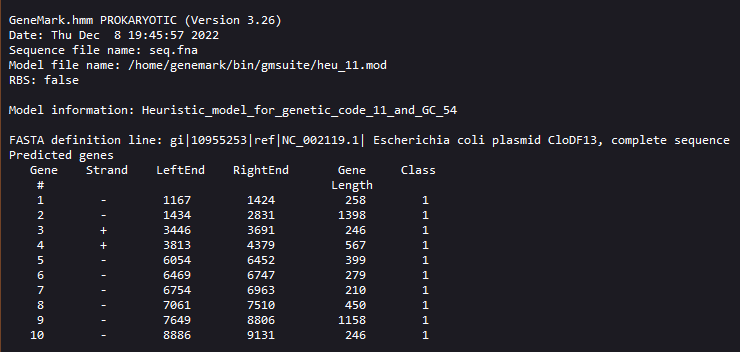

Genoma randomizado:

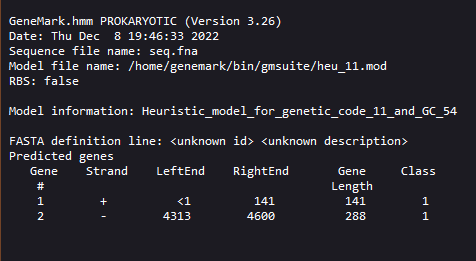

Se evidencia inmediatamente que hay muchos más candidatos en el gen original del plásmido.

Una de las razones que podrian influir en esto es el hecho de que es necesario un codón de inicio (AUG), el cual tiene una probabilidad de 1/64 de ocurrir, y un codón de terminación, el cual tiene una probabilidad de 3/64 de ocurrir.

***
# Pregunta 6

### a)
Para este desarrollo se 